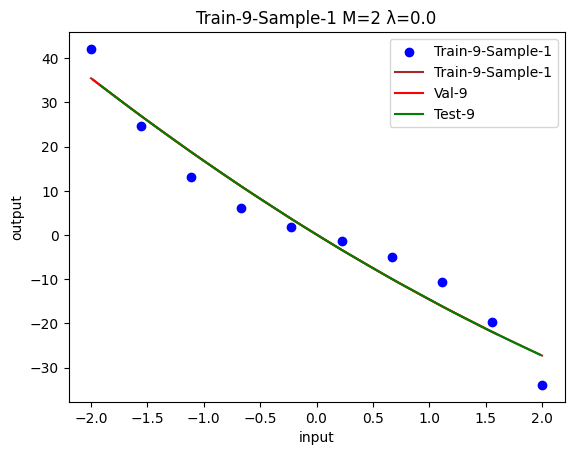

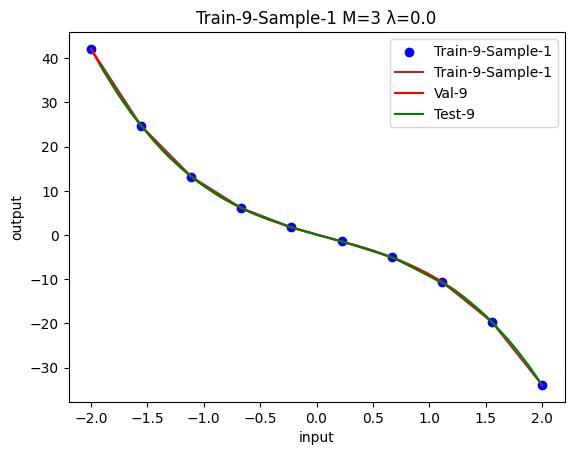

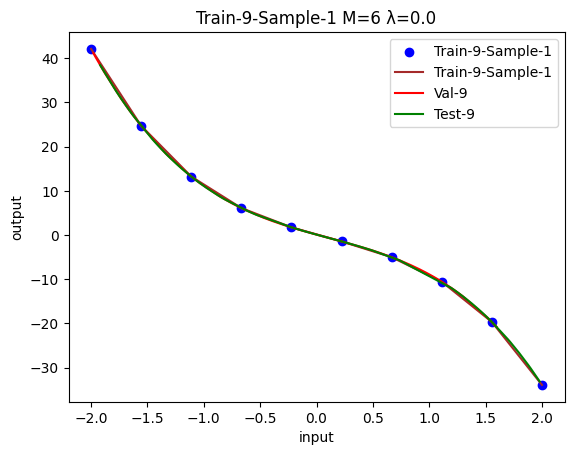

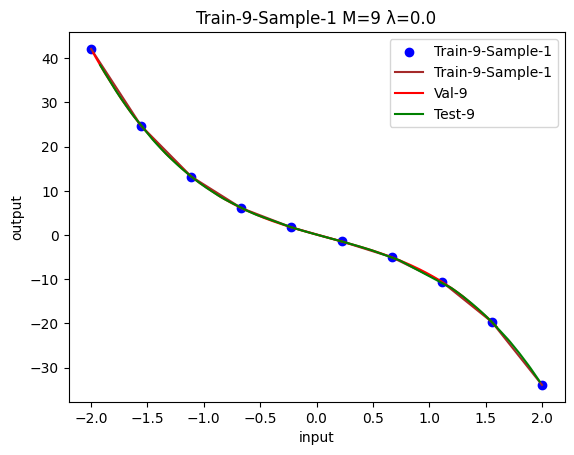

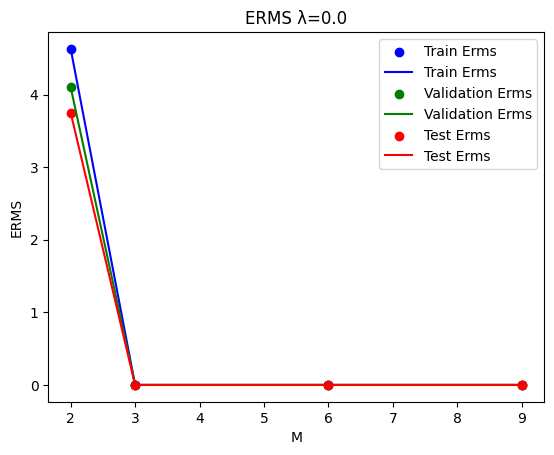

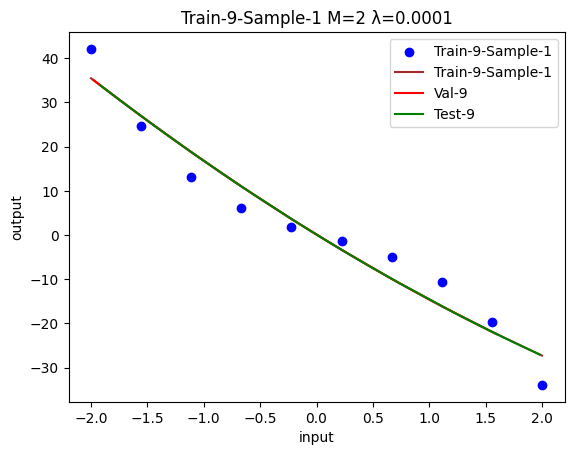

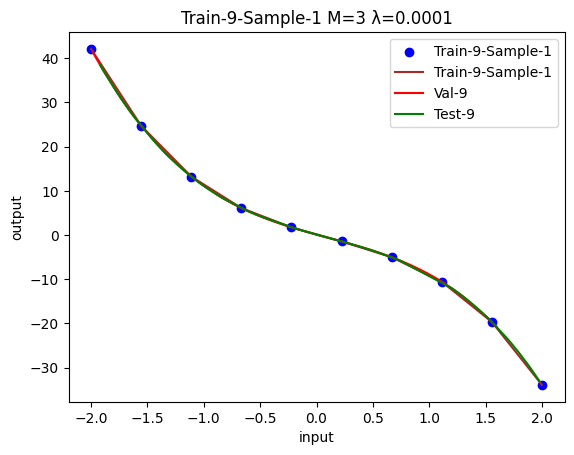

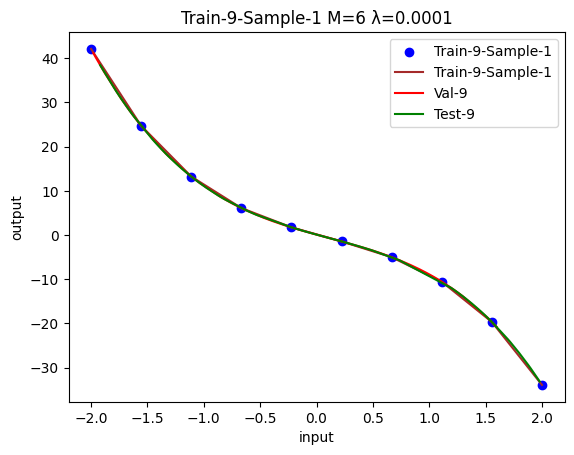

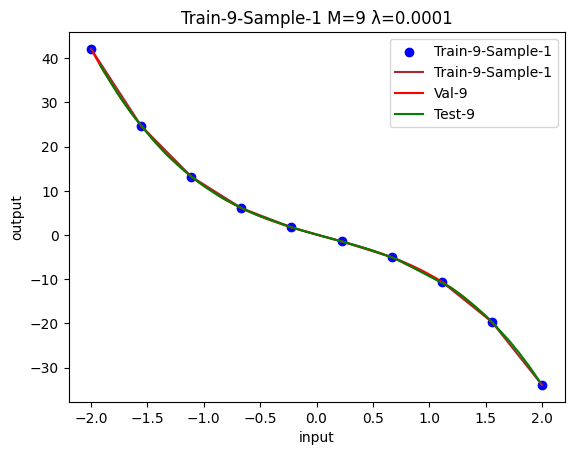

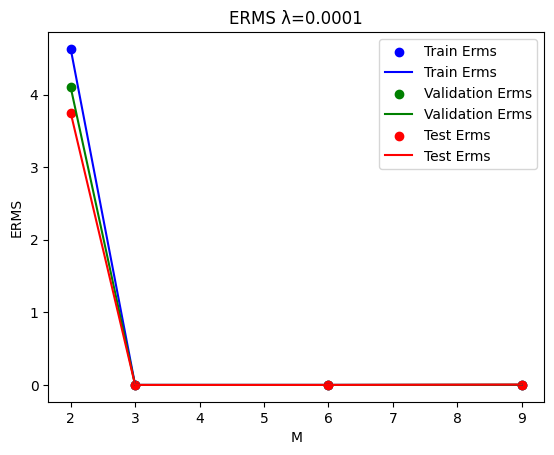

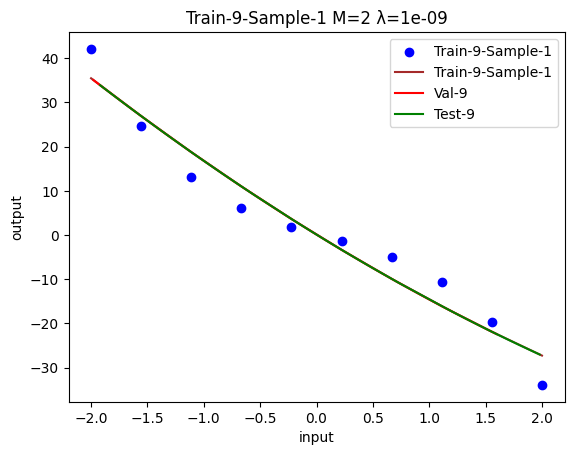

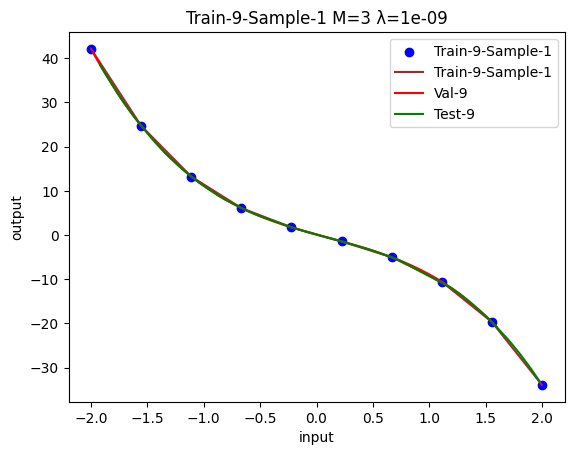

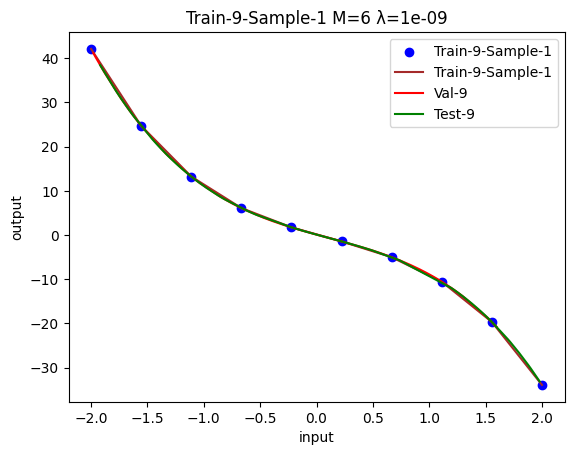

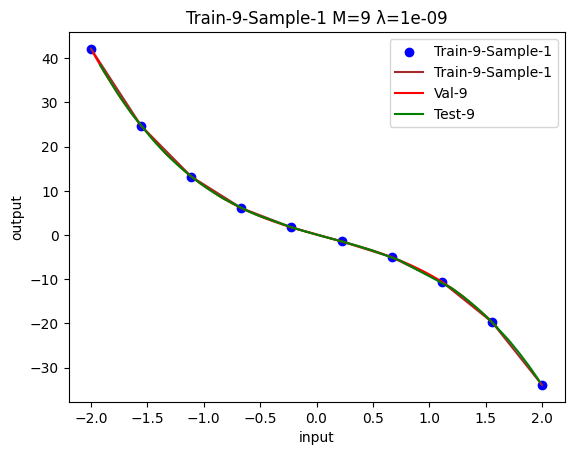

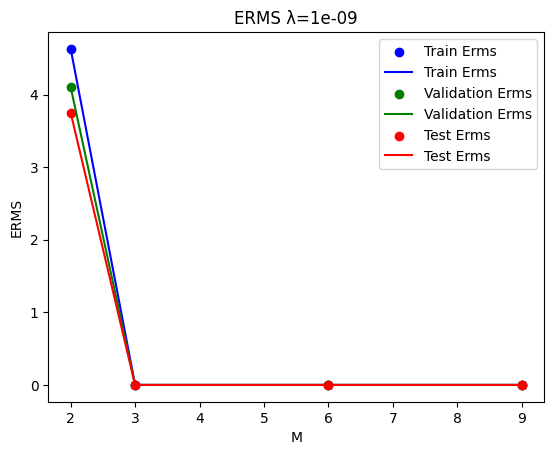

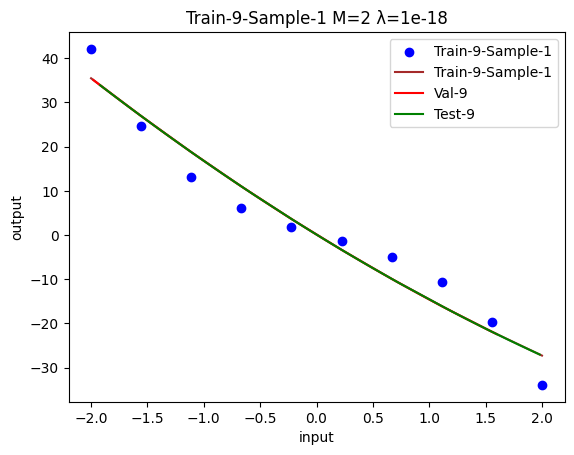

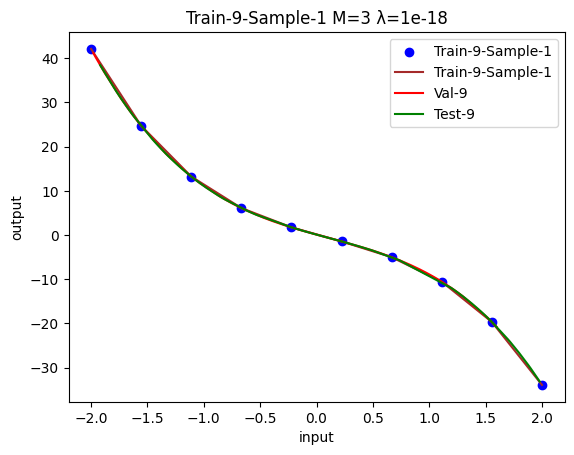

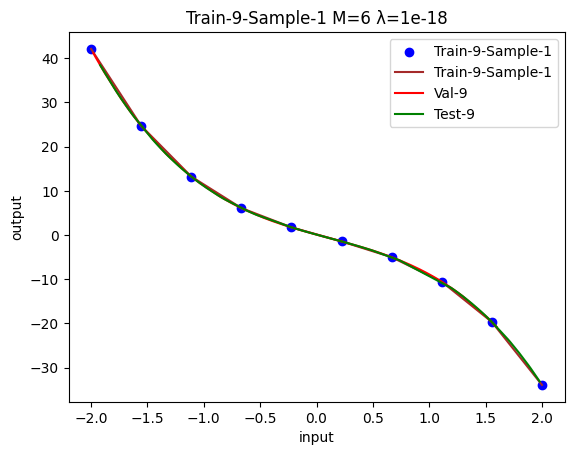

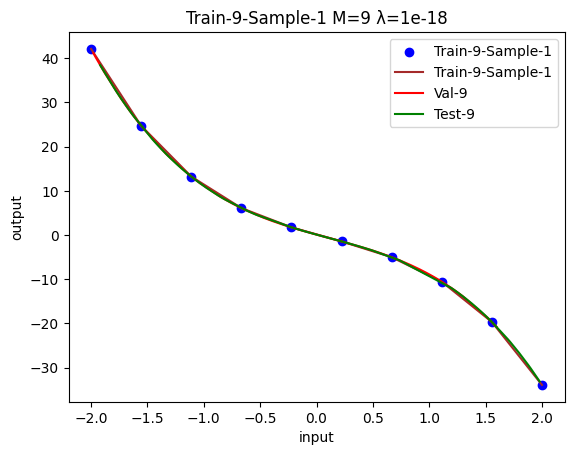

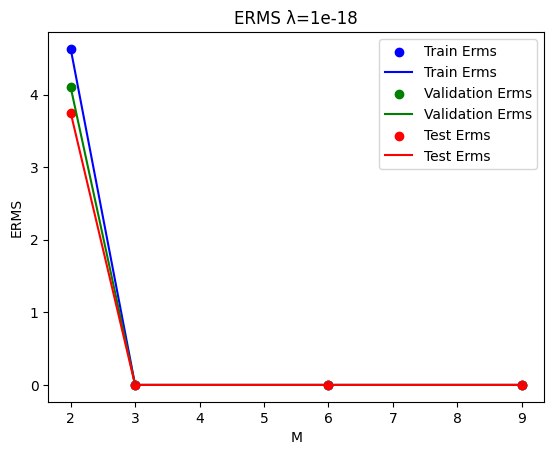

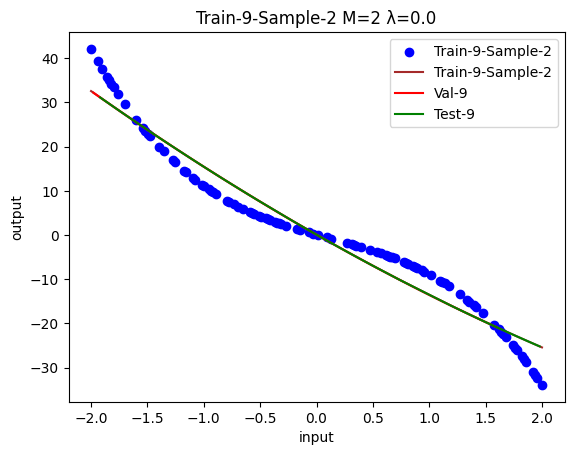

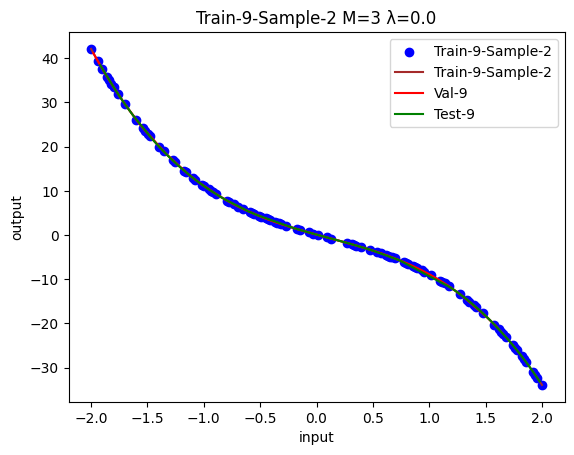

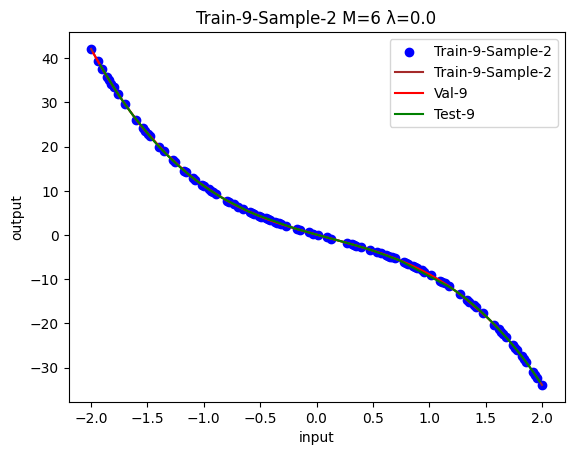

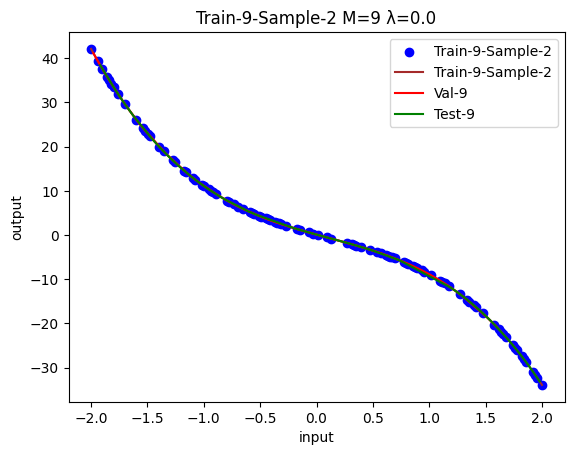

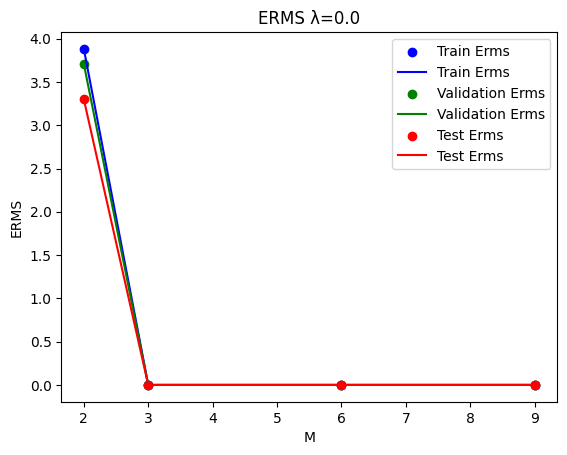

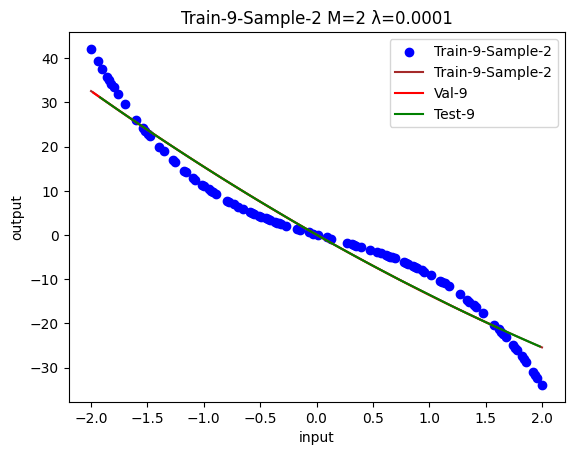

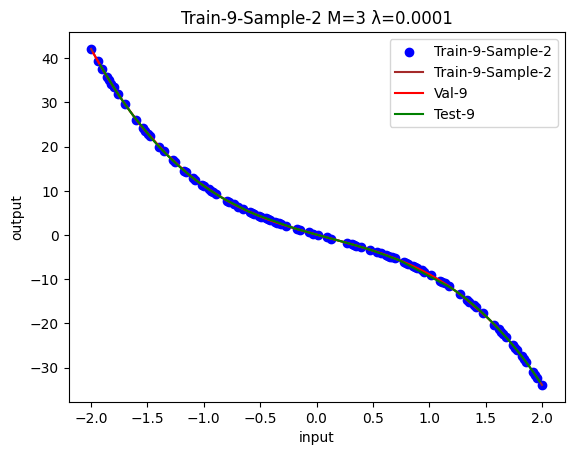

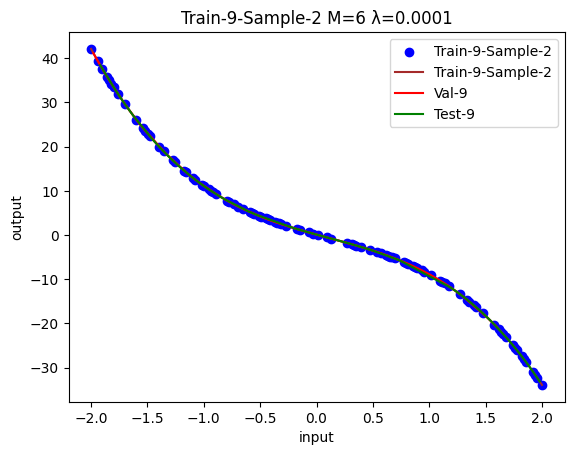

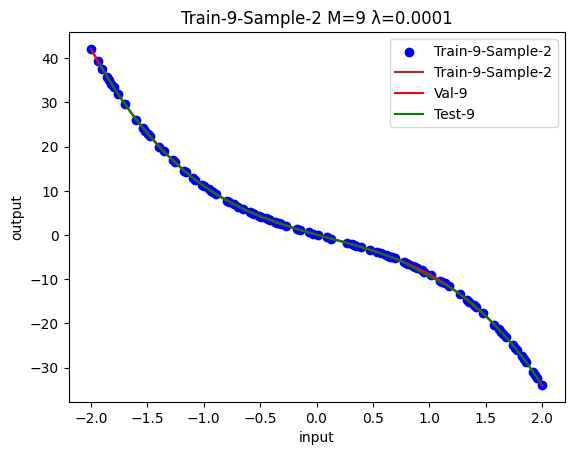

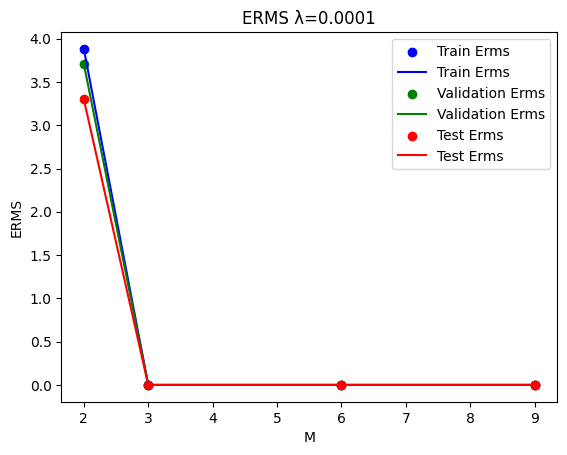

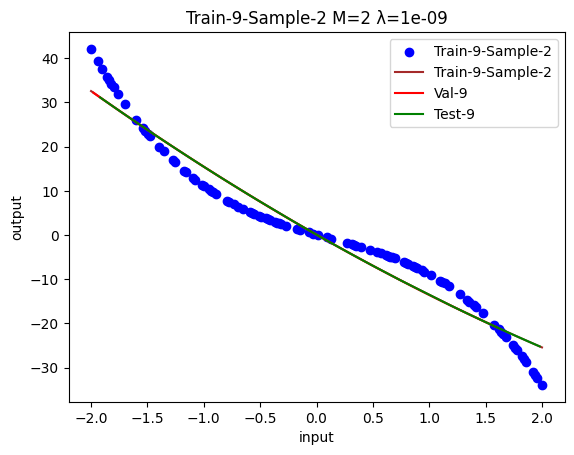

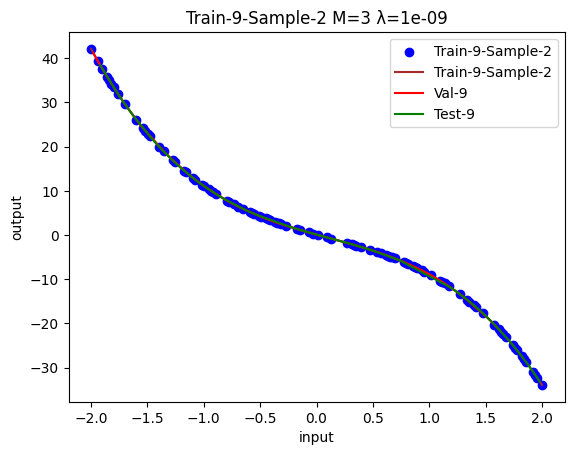

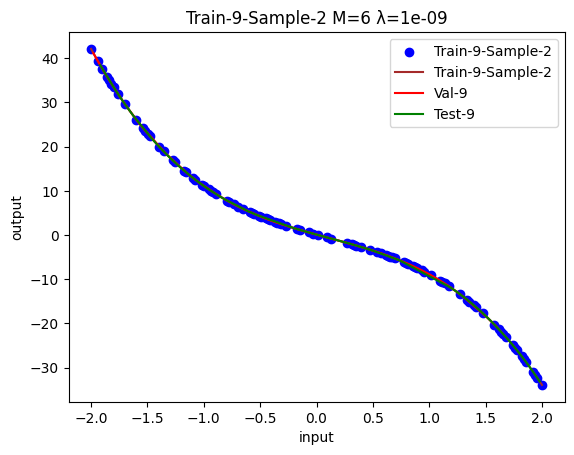

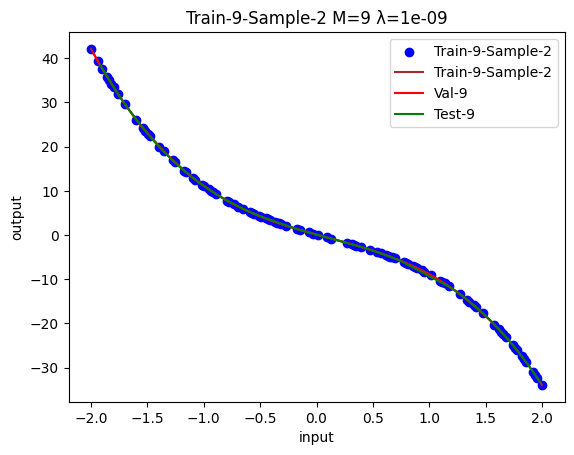

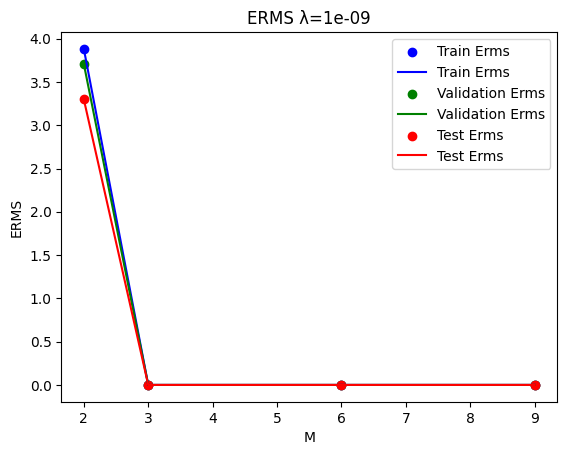

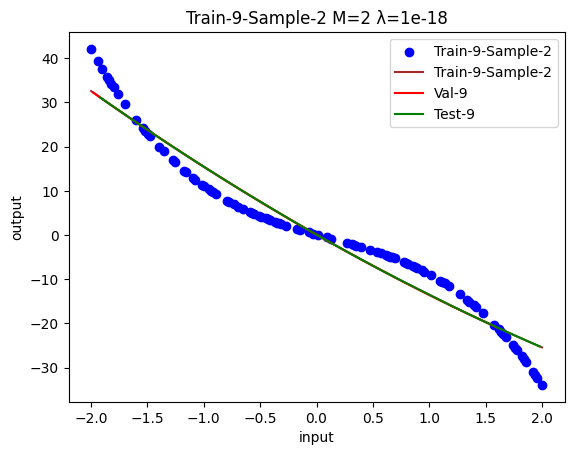

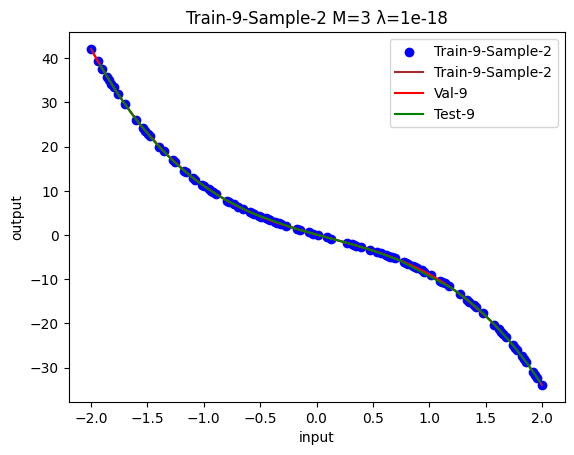

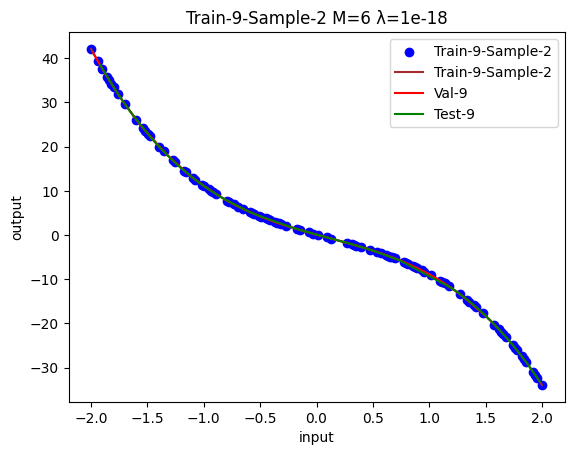

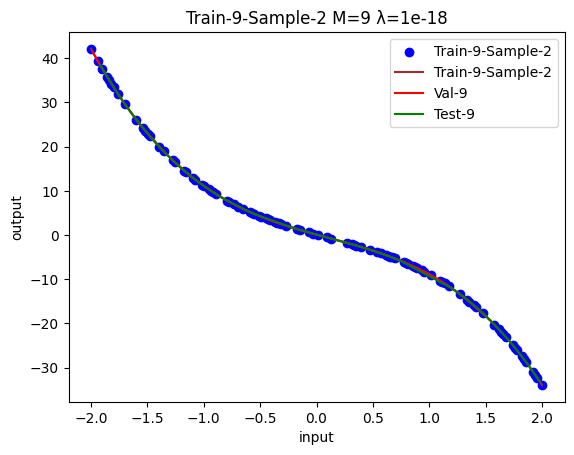

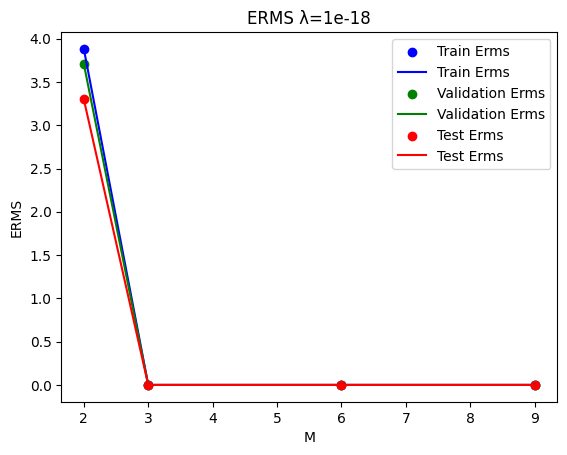

Index Sample Size Degree            λ   Train Erms  Validate Erms    Test Erms
    1          10      2 0.000000e+00 4.628802e+00   4.099706e+00 3.748458e+00
    2          10      3 0.000000e+00 1.560407e-14   1.172123e-14 1.196245e-14
    3          10      6 0.000000e+00 1.423966e-12   6.008154e-13 1.087857e-12
    4          10      9 0.000000e+00 5.171374e-09   4.612451e-09 5.247640e-09
    5          10      2 1.000000e-04 4.628802e+00   4.099655e+00 3.748403e+00
    6          10      3 1.000000e-04 1.246977e-04   1.276505e-04 1.246089e-04
    7          10      6 1.000000e-04 1.891402e-04   2.079941e-04 1.917452e-04
    8          10      9 1.000000e-04 7.169849e-04   3.263835e-03 4.991686e-03
    9          10      2 1.000000e-09 4.628802e+00   4.099706e+00 3.748458e+00
   10          10      3 1.000000e-09 1.247041e-09   1.276568e-09 1.246147e-09
   11          10      6 1.000000e-09 1.891868e-09   2.080615e-09 1.918241e-09
   12          10      9 1.000000e-09 8.293001e-09  

In [10]:
"""
Task 1. 
    Input -
        Datasets_for_A1 folder needs to be in the current working 
        directory with the folder structure as 
        Datasets_for_A1/Regression/Dataset 1/<team number>/
        Replace <team number> with the actual number.
        e.g. Datasets_for_A1/Regression/Dataset 1/9/
    Output -
        Polynomial curve fitting for Dataset 1
        Regularization methods:
            1. No regularization
            2. Quadratic regularization
        Presentation of Results:
            • For Task1: Plot of the approximated functions obtained
            using training datasets of different sizes (10 and 100),
            for different model complexities (degrees 2, 3, 6 and 9)
            and for different values of λ.
            (Similar to Figures 1.4, 1.6 and 1.7 of Bishop’s book).
            • Tables showing the 𝐸𝑅𝑀𝑆 on the training data, the validation
            data and the test data, for different models.
"""

import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

lambda_string = "λ"
column_names = [
    "Index",
    "Sample Size",
    "Degree",
    "λ",
    "Train Erms",
    "Validate Erms",
    "Test Erms",
]
table_index = 0
table_df = pd.DataFrame(columns=column_names)


def add_data_to_table(sample_size, M, lamda, train_erms, validate_erms, test_erms):
    row_data = {}
    global table_df
    global table_index
    table_index = table_index + 1
    row_data["Index"] = table_index
    row_data["Sample Size"] = sample_size
    row_data["Degree"] = M
    row_data["λ"] = lamda
    row_data["Train Erms"] = train_erms
    row_data["Validate Erms"] = validate_erms
    row_data["Test Erms"] = test_erms
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        table_df = pd.concat(
            [table_df, pd.DataFrame(row_data, index=[0])], ignore_index=True
        )


def print_table():
    print(table_df.to_string(index=False))


def factorial(n):
    ele = np.arange(1, n + 1)
    fact = np.prod(ele)

    return fact


def get_N(x):
    N = len(x)
    return N


def get_D(d, M):
    D = factorial(M + d) / (factorial(M) * factorial(d))

    return D


def get_polyline(start, stop, N):
    polyline = np.linspace(start, stop, num=N)

    return polyline


def get_identity_matrix(n):
    identity_matrix = np.eye(n)

    return identity_matrix


def get_small_phi(xi, M):
    small_phi = []
    each_degree = 0
    for each_degree in range(M + 1):
        small_phi.append(xi**each_degree)
        # print("x[", each_feature, "] ", x, " basis function [", small_phi, "]")

    return small_phi


def get_big_phi(x, M, N):
    big_phi = []
    each_feature = 0

    for each_feature in range(N):
        xi = x[each_feature]
        small_phi = get_small_phi(xi, M)
        big_phi.append(small_phi)
    np_big_phi = np.array(big_phi)
    # print("design matrix ", np_big_phi)
    return np_big_phi


def get_new_y(w, x, N, M):
    new_y = []
    loop1 = 0

    for loop1 in range(N):
        # for loop1 in range(len(val_x)):
        xi = x[loop1]
        y = 0
        loop2 = 0
        for loop2 in range(M + 1):
            wi = w[loop2]
            y = y + wi * (xi**loop2)
        new_y.append(y)

    return new_y


def get_erms(y, t):
    loop = 0
    total_data = len(y)
    # print("len y ", len(y), " len t ", len(t))
    sum = 0

    for loop in range(total_data):
        sum = sum + np.square(y[loop] - t[loop])
        # print("loop ", loop, " sum ", sum)

    error = sum / total_data

    erms = np.sqrt(error)

    return erms


def scatter_plot(x, y, x_label, y_label, plot_title, plot_color):
    plt.scatter(x, y, color=plot_color, label=plot_title)
    plt.title(plot_title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    # plt.show()


def line_plot(polyline, y, plot_label, plot_color):
    plt.plot(polyline, y, color=plot_color, label=plot_label)
    plt.legend()
    # plt.show()


def plot_erms(n):
    global table_df
    last_n_rows = table_df.tail(n)
    # print(last_4_rows)
    degree_array = last_n_rows["Degree"].values
    lambda_array = last_n_rows["λ"].values
    train_erms_array = last_n_rows["Train Erms"].values
    validate_erms_array = last_n_rows["Validate Erms"].values
    test_erms_array = last_n_rows["Test Erms"].values

    plot_title = "Train Erms"
    scatter_plot(degree_array, train_erms_array, "M", "ERMS", plot_title, "blue")
    line_plot(degree_array, train_erms_array, plot_title, "blue")
    plot_title = "Validation Erms"
    scatter_plot(degree_array, validate_erms_array, "M", "ERMS", plot_title, "green")
    line_plot(degree_array, validate_erms_array, plot_title, "green")
    plot_title = "Test Erms"
    scatter_plot(degree_array, test_erms_array, "M", "ERMS", plot_title, "red")
    line_plot(degree_array, test_erms_array, plot_title, "red")
    plot_title = "ERMS λ=" + str(lambda_array[0])
    plt.title(plot_title)
    plt.show()


def my_pseudo_inverse(matrix):
    matrix_transpose = np.transpose(matrix)
    phi_trans_multi_phi = np.dot(matrix_transpose, matrix)
    phi_trans_multi_phi_inv = np.linalg.inv(phi_trans_multi_phi)
    phi_trans_multi_phi_inv_multi_phi_trans = np.dot(
        phi_trans_multi_phi_inv, matrix_transpose
    )

    return phi_trans_multi_phi_inv_multi_phi_trans


def my_pseudo_inverse_with_regularization(matrix, matrix_dimension, lamda):
    matrix_transpose = np.transpose(matrix)
    phi_trans_multi_phi = np.dot(matrix_transpose, matrix)
    Identity = get_identity_matrix(matrix_dimension)
    regularization_matrix = np.multiply(Identity, lamda)
    phi_trans_multi_phi_add_regularized = np.add(
        phi_trans_multi_phi, regularization_matrix
    )
    phi_trans_multi_phi_inv = np.linalg.inv(phi_trans_multi_phi_add_regularized)
    phi_trans_multi_phi_inv_multi_phi_trans = np.dot(
        phi_trans_multi_phi_inv, matrix_transpose
    )

    return phi_trans_multi_phi_inv_multi_phi_trans


def my_polyfit(x, y, M, N, D, lamda=0.0):
    big_phi = get_big_phi(x, M, N)

    if lamda == 0.0:
        # pseudo_inv_np_big_phi = np.linalg.pinv(np_big_phi)
        # print("pseudo inverse design matrix ", pseudo_inv_np_big_phi)
        my_pseudo_inv_np_big_phi = my_pseudo_inverse(big_phi)
        # print("my pseudo inverse design matrix ", my_pseudo_inv_np_big_phi)
        pseudo_inv_np_big_phi = my_pseudo_inv_np_big_phi
    else:
        # pseudo_inv_np_big_phi = np.linalg.inv(np_big_phi.T @ np_big_phi + lamda * np.eye(np_big_phi.shape[1])) @ np_big_phi.T
        # print("pseudo inverse design matrix ", pseudo_inv_np_big_phi)
        my_regularized_pseudo_inv_np_big_phi = my_pseudo_inverse_with_regularization(
            big_phi, D, lamda
        )
        # print("my regularized pseudo inverse design matrix ", my_regularized_pseudo_inv_np_big_phi)
        pseudo_inv_np_big_phi = my_regularized_pseudo_inv_np_big_phi

    w = np.dot(pseudo_inv_np_big_phi, y)
    # print("w ", w)

    return w


def my_poly1d(w, polyline, N, M):
    new_y = get_new_y(w, polyline, N, M)

    return new_y


def plot_graphs(train_x, train_y, d, title, val_x, val_y, test_x, test_y, lamda=0.0):
    degrees = [2, 3, 6, 9]
    # start = -2
    # stop = 2
    # degrees = [2]
    # print(title)
    # column_names = ['Sample Size', 'Degree', 'λ', 'Train Erms', 'Validate Erms', 'Test Erms']
    # table_df = pd.DataFrame(columns=column_names)

    for M in degrees:
        N = get_N(train_x)
        D = get_D(d, M)
        # print("N = ", N, " d = ", d, " M = ", M, " D = ", D)
        w = my_polyfit(train_x, train_y, M, N, int(D), lamda)
        sample_size = N
        # polyline = get_polyline(start, stop, N)
        new_train_y = my_poly1d(w, train_x, N, M)
        plot_title = title
        scatter_plot(train_x, train_y, "input", "output", plot_title, "blue")
        line_plot(train_x, new_train_y, plot_title, "brown")
        new_train_y = get_new_y(w, train_x, N, M)
        train_erms = get_erms(new_train_y, train_y)
        # print("Erms(sample size = ", N, " degree = ", M, " lambda = ",regularization_coefficient,") train_erms = ",train_erms)

        N = get_N(val_x)
        # polyline = get_polyline(start, stop, N)
        new_val_y = my_poly1d(w, val_x, N, M)
        plot_title = "Val-9"
        line_plot(val_x, new_val_y, plot_title, "red")
        new_val_y = get_new_y(w, val_x, N, M)
        validate_erms = get_erms(new_val_y, val_y)
        # print("Erms(sample size = ", N, " degree = ", M, " lambda = ",regularization_coefficient,") validate_erms = ",validate_erms)

        N = get_N(test_x)
        # polyline = get_polyline(start, stop, N)
        new_test_y = my_poly1d(w, test_x, N, M)
        plot_title = "Test-9"
        line_plot(test_x, new_test_y, plot_title, "green")
        new_test_y = get_new_y(w, test_x, N, M)
        test_erms = get_erms(new_test_y, test_y)
        # print("Erms(sample size = ", N, " degree = ", M, " lambda = ",regularization_coefficient,") test_erms = ",test_erms)

        add_data_to_table(sample_size, M, lamda, train_erms, validate_erms, test_erms)

        plot_title = title + " M=" + str(M) + " λ=" + str(lamda)
        plt.title(plot_title)
        plt.show()

    plot_erms(len(degrees))


def main():
    folder_number = "9"
    current_directory = os.getcwd()
    # regression_dataset_1_path=current_directory+ "/Datasets_for_A1/Regression/Dataset 1/"+folder_number+"/"
    regression_dataset_1_path = (
        "/home/dipendu/programs/mtech_2023/ml/ass1/Datasets_for_A1/Regression/Dataset 1/"
        + folder_number
        + "/"
    )

    regression_dataset_1_Train_Sample_1 = (
        regression_dataset_1_path + "Train-" + folder_number + "-Sample-1.csv"
    )
    # df = pd.read_csv(regression_dataset_1_Train_Sample_1)
    # train_x_1 = np.squeeze(np.asanyarray(df[["input"]]))
    # train_y_1 = np.squeeze(np.asanyarray(df[["output"]]))
    # data = list(zip(train_x_1, train_y_1))
    # sorted_data = sorted(data, key=lambda x: x[0])
    # train_x_1, train_y_1 = zip(*sorted_data)
    df = pd.read_csv(regression_dataset_1_Train_Sample_1)
    data = df.to_numpy()
    sorted_data = data[data[:, 1].argsort()]
    train_x_1 = sorted_data[:, 1]
    train_y_1 = sorted_data[:, 2]
    # print(data)
    # print(sorted_data)
    # print(train_x_1)
    # print(train_y_1)

    regression_dataset_1_Train_Sample_2 = (
        regression_dataset_1_path + "Train-" + folder_number + "-Sample-2.csv"
    )
    # df = pd.read_csv(regression_dataset_1_Train_Sample_2)
    # train_x_2 = np.squeeze(np.asanyarray(df[["input"]]))
    # train_y_2 = np.squeeze(np.asanyarray(df[["output"]]))
    # data = list(zip(train_x_2, train_y_2))
    # sorted_data = sorted(data, key=lambda x: x[0])
    # train_x_2, train_y_2 = zip(*sorted_data)
    df = pd.read_csv(regression_dataset_1_Train_Sample_2)
    data = df.to_numpy()
    sorted_data = data[data[:, 1].argsort()]
    train_x_2 = sorted_data[:, 1]
    train_y_2 = sorted_data[:, 2]
    # print(data)
    # print(sorted_data)
    # print(train_x_2)
    # print(train_y_2)

    regression_dataset_1_validation = (
        regression_dataset_1_path + "Val-" + folder_number + ".csv"
    )
    # df = pd.read_csv(regression_dataset_1_validation)
    # val_x = np.squeeze(np.asanyarray(df[["input"]]))
    # val_y = np.squeeze(np.asanyarray(df[["output"]]))
    # data = list(zip(val_x, val_y))
    # sorted_data = sorted(data, key=lambda x: x[0])
    # val_x, val_y = zip(*sorted_data)
    df = pd.read_csv(regression_dataset_1_validation)
    data = df.to_numpy()
    sorted_data = data[data[:, 1].argsort()]
    val_x = sorted_data[:, 1]
    val_y = sorted_data[:, 2]
    # print(data)
    # print(sorted_data)
    # print(val_x)
    # print(val_y)

    regression_dataset_1_test = (
        regression_dataset_1_path + "Test-" + folder_number + ".csv"
    )
    # df = pd.read_csv(regression_dataset_1_test)
    # test_x = np.squeeze(np.asanyarray(df[["input"]]))
    # test_y = np.squeeze(np.asanyarray(df[["output"]]))
    # data = list(zip(test_x, test_y))
    # sorted_data = sorted(data, key=lambda x: x[0])
    # test_x, test_y = zip(*sorted_data)
    df = pd.read_csv(regression_dataset_1_test)
    data = df.to_numpy()
    sorted_data = data[data[:, 1].argsort()]
    test_x = sorted_data[:, 1]
    test_y = sorted_data[:, 2]
    # print(data)
    # print(sorted_data)
    # print(test_x)
    # print(test_y)

    regularization_coefficients = [0.0, 0.0001, 1e-9, 1e-18]
    # regularization_coefficients = [0.0]
    d = 1

    for lamda in regularization_coefficients:
        plot_graphs(
            train_x_1,
            train_y_1,
            d,
            "Train-" + folder_number + "-Sample-1",
            val_x,
            val_y,
            test_x,
            test_y,
            lamda,
        )

    for lamda in regularization_coefficients:
        plot_graphs(
            train_x_2,
            train_y_2,
            d,
            "Train-" + folder_number + "-Sample-2",
            val_x,
            val_y,
            test_x,
            test_y,
            lamda,
        )

    print_table()


if __name__ == "__main__":
    main()